In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-aug-2021-lightgbm/__results__.html
/kaggle/input/tabular-aug-2021-lightgbm/__resultx__.html
/kaggle/input/tabular-aug-2021-lightgbm/submit.csv
/kaggle/input/tabular-aug-2021-lightgbm/__notebook__.ipynb
/kaggle/input/tabular-aug-2021-lightgbm/__output__.json
/kaggle/input/tabular-aug-2021-lightgbm/custom.css
/kaggle/input/lightautoml-classifier-regressor-mix/LightAutoML_utilized_submission.csv
/kaggle/input/lightautoml-classifier-regressor-mix/__results__.html
/kaggle/input/lightautoml-classifier-regressor-mix/__notebook__.ipynb
/kaggle/input/lightautoml-classifier-regressor-mix/__output__.json
/kaggle/input/lightautoml-classifier-regressor-mix/custom.css
/kaggle/input/lightautoml-classifier-regressor-mix/__results___files/__results___38_1.png
/kaggle/input/lightautoml-classifier-regressor-mix/__results___files/__results___39_1.png
/kaggle/input/lightautoml-classifier-regressor-mix/__results___files/__results___48_1.png
/kaggle/input/lightautoml-classifier-regresso

In [104]:
test = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2021/test.csv", index_col="id")

In [4]:
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
main = pd.read_csv("/kaggle/input/own-blending/final_submission4.csv", index_col="id")

In [10]:
automl = pd.read_csv("/kaggle/input/lightautoml-classifier-regressor-mix/LightAutoML_utilized_submission.csv", index_col="id")

In [11]:
voting = pd.read_csv("/kaggle/input/falling-below-7-87-voting-cb-xgb-lgbm/voting.csv", index_col="id")

In [15]:
NN = pd.read_csv("/kaggle/input/tabular-denoising-residual-network/submission.csv", index_col="ID")

In [40]:
main.values[2, 0]

8.646786989939075

In [79]:
def ensemble(main, support, coeff):
    
    ensemble = main * coeff + support * (1-coeff)
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nE N S E M B L I N G {coeff}\n')   
      
    plt.scatter(main, support, s=5, label='Support', alpha=1)    
    plt.scatter(main, ensemble, s=1.5, label='Ensemble')
    plt.scatter(main, main , s=0.1, label='Main')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()  
    
    sns.distplot(main)
    sns.distplot(support, color="red", )
    sns.distplot(ensemble, color="green")
    return ensemble

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

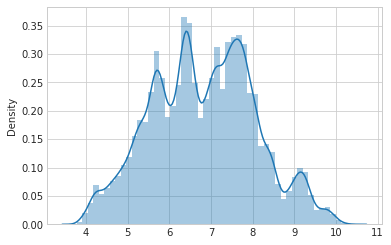

In [85]:
sns.distplot(main)

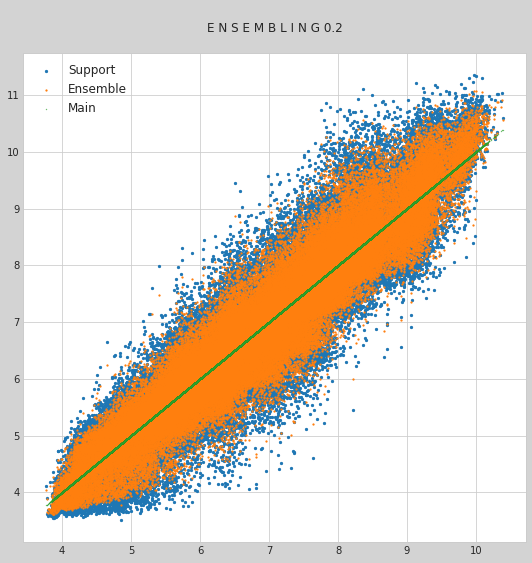

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

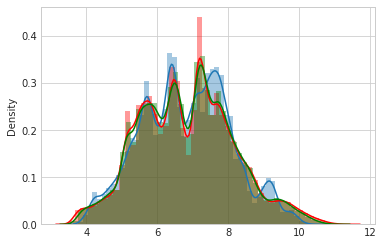

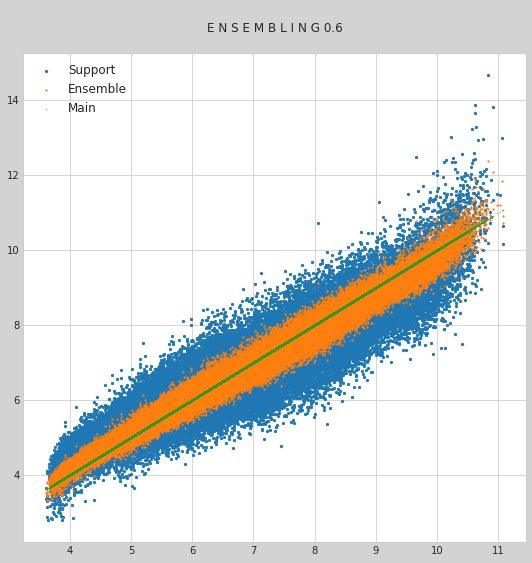

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

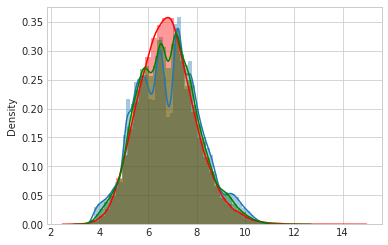

In [89]:
automl_ = ensemble(main, automl, 0.1)
final = ensemble(automl_, NN, 0.6)

In [130]:
weights = [0.8,0.07,0.13]
ensemble = weights[0]*automl + weights[1]*NN + weights[2]*voting

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

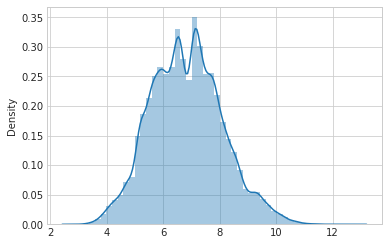

In [125]:
sns.distplot(ensemble)

In [131]:
predictions = pd.DataFrame()
predictions["id"] = test.index
predictions["loss"] = ensemble["loss"].values
predictions.to_csv('0.8autoML0.07NN0.13VOTING.csv', index=False, header=predictions.columns)

In [132]:
predictions

,id,loss
0,250000,8.204428
1,250001,5.269771
2,250002,8.998586
3,250003,7.859307
4,250004,6.770541
...,...,...
149995,399995,7.879063
149996,399996,7.606799
149997,399997,6.121918
149998,399998,5.098573


In [100]:
final.to_csv('submission_NN_automl.csv', index=False)

In [98]:
final

,loss
id,
250000,8.065404
250001,5.397152
250002,8.763601
250003,7.825851
250004,6.695428
...,...
399995,7.838095
399996,7.395773
399997,6.204425


In [97]:
predictions

,id,loss
0,250000,NaN
1,250001,NaN
2,250002,NaN
3,250003,NaN
4,250004,NaN
...,...,...
149995,399995,NaN
149996,399996,NaN
149997,399997,NaN
149998,399998,NaN


In [95]:
final["loss"]

id
250000    8.065404
250001    5.397152
250002    8.763601
250003    7.825851
250004    6.695428
            ...   
399995    7.838095
399996    7.395773
399997    6.204425
399998    5.290660
399999    7.311468
Name: loss, Length: 150000, dtype: float64